In [1]:
import torch

In [4]:
z = torch.zeros(5, 3)
print(z)
print(z.dtype)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.float32


In [5]:
i = torch.ones((5, 3), dtype=torch.int16)
print(i)

tensor([[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]], dtype=torch.int16)


In [8]:
torch.manual_seed(420)
r1 = torch.rand(2, 2)
print("A random tensor:")
print(r1)

r2 = torch.rand(2, 2)
print("Another random tensor:")
print(r2)

torch.manual_seed(420)
r3 = torch.rand(2, 2)
print("Should be the same as r1:")
print(r3)

A random tensor:
tensor([[0.8054, 0.1990],
        [0.9759, 0.1028]])
Another random tensor:
tensor([[0.3475, 0.1554],
        [0.8856, 0.6876]])
Should be the same as r1:
tensor([[0.8054, 0.1990],
        [0.9759, 0.1028]])


In [9]:
ones = torch.ones(2, 3)
print(ones)

twos = torch.ones(2, 3) * 2
print(twos)

threes = ones + twos
print(threes)
print(threes.shape)

r1 = torch.rand(2, 3)
r2 = torch.rand(3, 2)
r3 = r1 + r2


tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[2., 2., 2.],
        [2., 2., 2.]])
tensor([[3., 3., 3.],
        [3., 3., 3.]])
torch.Size([2, 3])


RuntimeError: The size of tensor a (3) must match the size of tensor b (2) at non-singleton dimension 1

In [10]:
r = (torch.rand(2, 2) - 0.5) * 2 # values between -1 and 1
print('A random matrix, r:')
print(r)

# Common mathematical operations are supported:
print('\nAbsolute value of r:')
print(torch.abs(r))

# ...as are trigonometric functions:
print('\nInverse sine of r:')
print(torch.asin(r))

# ...and linear algebra operations like determinant and singular value decomposition
print('\nDeterminant of r:')
print(torch.det(r))
print('\nSingular value decomposition of r:')
print(torch.svd(r))

# ...and statistical and aggregate operations:
print('\nAverage and standard deviation of r:')
print(torch.std_mean(r))
print('\nMaximum value of r:')
print(torch.max(r))

A random matrix, r:
tensor([[-0.3085, -0.9765],
        [-0.4856, -0.5456]])

Absolute value of r:
tensor([[0.3085, 0.9765],
        [0.4856, 0.5456]])

Inverse sine of r:
tensor([[-0.3136, -1.3538],
        [-0.5071, -0.5770]])

Determinant of r:
tensor(-0.3059)

Singular value decomposition of r:
torch.return_types.svd(
U=tensor([[-0.8225, -0.5687],
        [-0.5687,  0.8225]]),
S=tensor([1.2332, 0.2481]),
V=tensor([[ 0.4297, -0.9030],
        [ 0.9030,  0.4297]]))

Average and standard deviation of r:
(tensor(0.2835), tensor(-0.5791))

Maximum value of r:
tensor(-0.3085)


## PyTorch Models

In [12]:
import torch.nn as nn
import torch.nn.functional as F

In [13]:
class LeNet(nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()
    # 1 input image channel (black & white), 6 output channels, 5x5 square convolution
    # kernel
    self.conv1 = nn.Conv2d(1, 6, 5)
    self.conv2 = nn.Conv2d(6, 16, 5)
    # an affine operation: y = Wx + b
    self.fc1 = nn.Linear(16*5*5, 120) # 5*5 from image dimension
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)
    
  def forward(self, x):
    # Max pooling over a (2, 2) window
    x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
    # If the size is a square you can only specify a single number
    x = F.max_pool2d(F.relu(self.conv2(x)), 2)
    x = x.view(-1, self.num_flat_features(x))
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    return x
  
  def num_flat_features(self, x):
    size = x.size()[1:]  # all dimensions except the batch dimension
    num_features = 1
    for s in size:
        num_features *= s
    return num_features

In [16]:
net = LeNet()
print(net)

input = torch.rand(1, 1, 32, 32)
print('Image batch shape:')
print(input.shape)

output = net(input)
print('Raw output:')
print(output)
print('Output shape:')
print(output.shape)

LeNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
Image batch shape:
torch.Size([1, 1, 32, 32])
Raw output:
tensor([[-0.0281, -0.0433,  0.0241, -0.0115, -0.0973,  0.1297,  0.0969, -0.1031,
         -0.0102, -0.0070]], grad_fn=<AddmmBackward0>)
Output shape:
torch.Size([1, 10])


## Datasets and Dataloaders

In [17]:
import torchvision
import torchvision.transforms as transforms

In [18]:
transform = transforms.Compose(
  [
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))
  ]
)

In [19]:
from torch.utils.data import ConcatDataset
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                download=True, transform=transform)

# stack all train images together into a tensor of shape
# (50000, 3, 32, 32)
x = torch.stack([sample[0] for sample in ConcatDataset([trainset])])

# get the mean of each channel
mean = torch.mean(x, dim=(0,2,3)) # tensor([0.4914, 0.4822, 0.4465])
std = torch.std(x, dim=(0,2,3)) # tensor([0.2470, 0.2435, 0.2616])

100%|██████████| 170M/170M [00:10<00:00, 15.9MB/s] 


In [20]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

 deer   cat   cat   dog


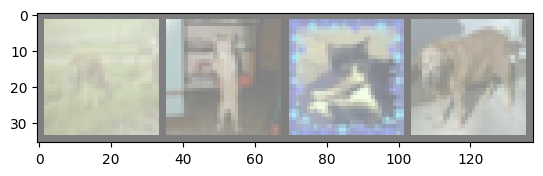

In [23]:
import matplotlib.pyplot as plt
import numpy as np

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [25]:
import torch.optim as optim

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [26]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [28]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [29]:
for epoch in range(2):  # loop over the dataset multiple times
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    # get the inputs
    inputs, labels = data

    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # print statistics
    running_loss += loss.item()
    if i % 2000 == 1999:    # print every 2000 mini-batches
        print('[%d, %5d] loss: %.3f' %
              (epoch + 1, i + 1, running_loss / 2000))
        running_loss = 0.0

  print('Finished Training')

[1,  2000] loss: 2.292
[1,  4000] loss: 2.093
[1,  6000] loss: 1.957
[1,  8000] loss: 1.805
[1, 10000] loss: 1.683
[1, 12000] loss: 1.588
Finished Training
[2,  2000] loss: 1.530
[2,  4000] loss: 1.499
[2,  6000] loss: 1.461
[2,  8000] loss: 1.438
[2, 10000] loss: 1.425
[2, 12000] loss: 1.388
Finished Training


In [30]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 48 %
